# (1) Data Understanding

In [1]:
import pandas as pd


In [2]:
#importing data
df = pd.read_csv('realtor-data.csv')

In [4]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [504]:
#checking data size
import numpy as np

df.shape

(923159, 12)

In [505]:
df.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [506]:
# Change from object to datetime
df['sold_date'] = pd.to_datetime(df['sold_date'])

In [507]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [508]:
df.isnull().sum()

status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [509]:
# check the percentage of null rows by columns
null_cols = df.isnull().sum() / df.shape[0] * 100
print(null_cols)

status           0.000000
price            0.007691
bed             14.266556
bath            12.478024
acre_lot        29.639856
full_address     0.000000
street           0.231596
city             0.008016
state            0.000000
zip_code         0.022206
house_size      32.263456
sold_date       50.561496
dtype: float64


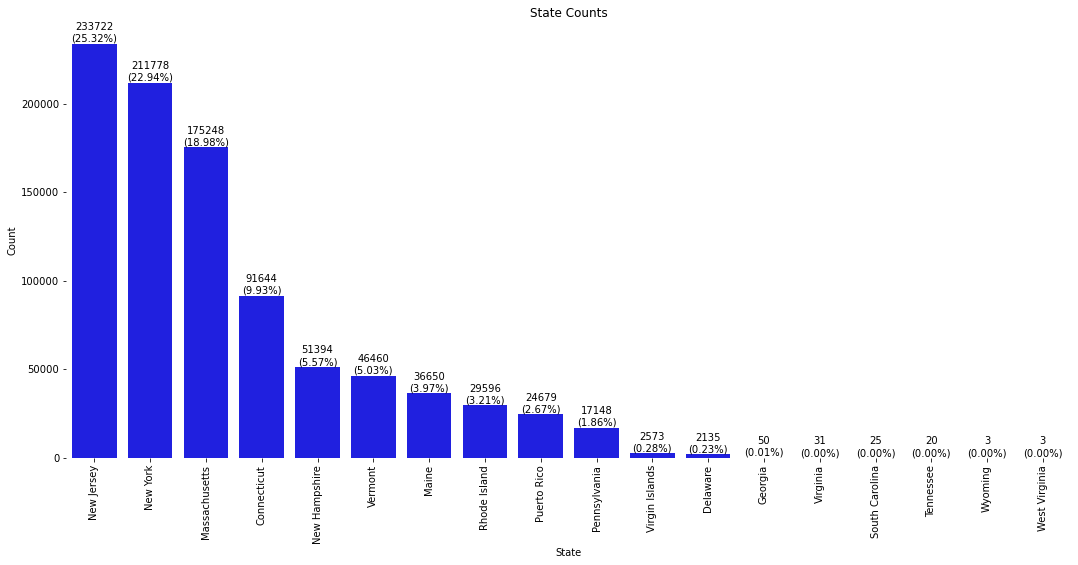

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the count of each state

state_counts = df['state'].value_counts()
total = len(df)

# create the count plot
plt.figure(figsize=(18,8))
ax = sns.countplot(x='state', data=df, order=state_counts.index, color="blue")

# add title and labels
plt.title("State Counts")
plt.xlabel("State")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# add labels with count and percentage of total for each state
for i, state in enumerate(ax.get_xticklabels()):
    count = state_counts[state.get_text()]
    percent = (count/total)*100
    ax.annotate('{}\n({:.2f}%)'.format(count, percent), (i, count), ha='center', va='bottom', fontsize=10)

# remove border line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    
    
plt.show()

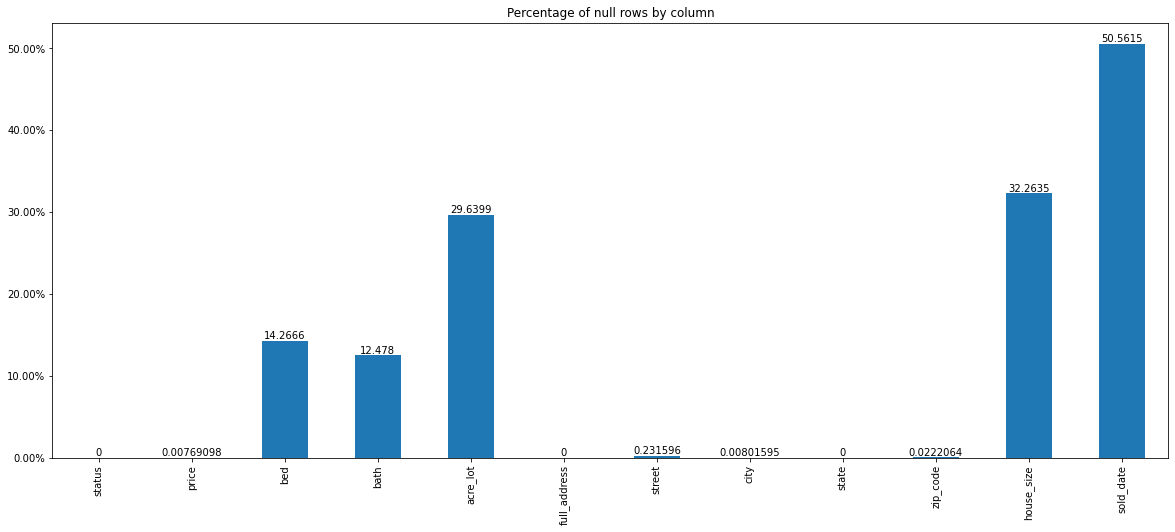

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns
# set the y-axis to display only two decimal places
ax = null_cols.plot.bar(figsize=(20,8), title='Percentage of null rows by column')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}%'.format(y)))

# add the labels with the percentage values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.show()

In [511]:
#iqr method price
# Calculate the first and third quartiles (25th and 75th percentiles) of the data
q1, q3 = np.percentile(df["price"], [25, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds for the data
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Identify the outliers in the data
outliers = [x for x in df["price"] if x < lower_bound or x > upper_bound]

len(outliers)

0

In [512]:
#iqr method price
# Calculate the first and third quartiles (25th and 75th percentiles) of the data
q1, q3 = np.percentile(df["house_size"], [25, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds for the data
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Identify the outliers in the data
outliers = [x for x in df["house_size"] if x < lower_bound or x > upper_bound]

len(outliers)

0

# (2) Data Preparation

In [513]:
#drop outliers
df = df[~df["price"].isin(outliers)]remo

SyntaxError: invalid syntax (3073468189.py, line 2)

In [514]:
#replace missing values with 0

df['price'].fillna(value=0, inplace=True)

In [515]:
df.isnull().sum()

status               0
price                0
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [516]:
#Create Datase only to not sold (sold_date = null)

df_notsold=df[df['sold_date'].isnull()]

# (3) Data Visualization

In [517]:
import matplotlib.pyplot as plt
import seaborn as sns

In [518]:
# Checking correlations
correlation = df_notsold.corr()

<AxesSubplot:>

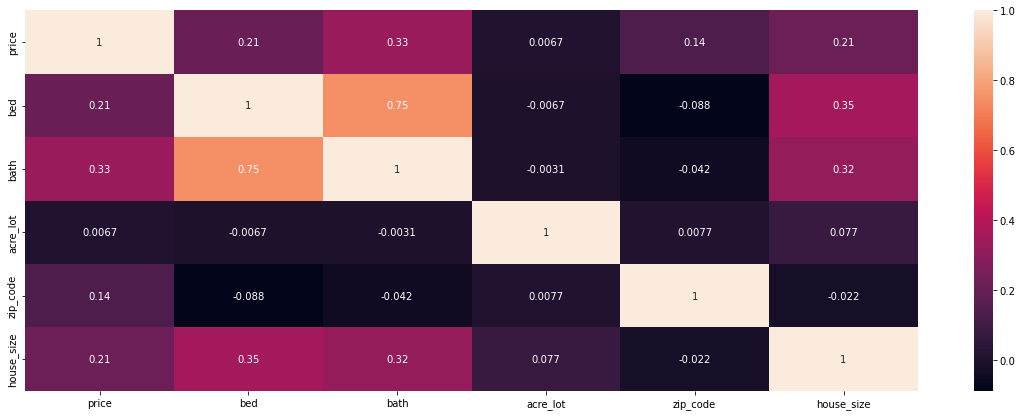

In [519]:
# correlation plot
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

In [520]:
dep_var = 'price'
indep_vars = ['zip_code','bed','bath','house_size']
correlation.loc[indep_vars, dep_var]

zip_code      0.136769
bed           0.205265
bath          0.328568
house_size    0.209654
Name: price, dtype: float64

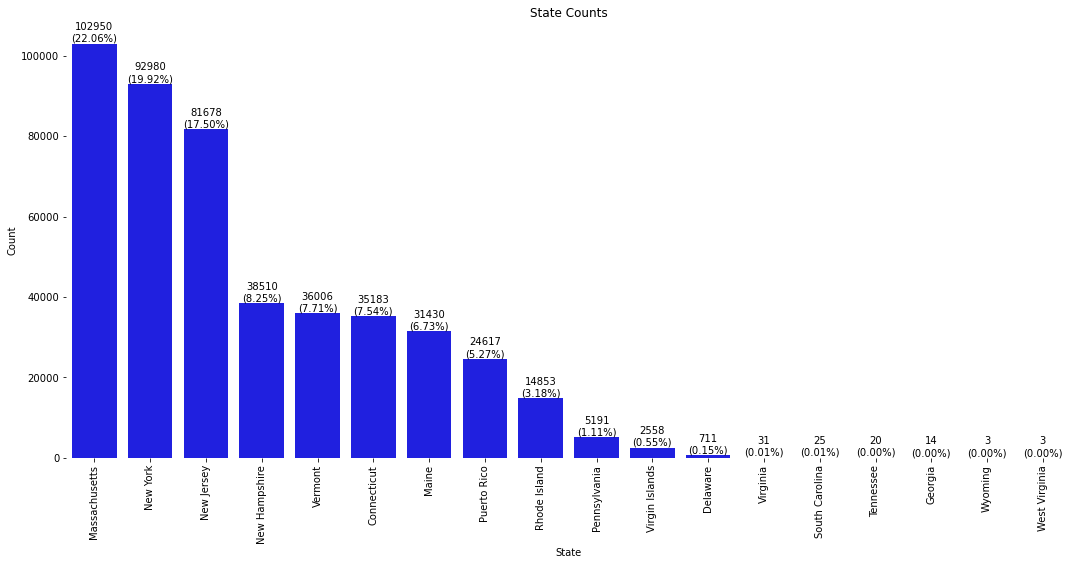

In [521]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the count of each state

state_counts = df_notsold['state'].value_counts()
total = len(df_notsold)

# create the count plot
plt.figure(figsize=(18,8))
ax = sns.countplot(x='state', data=df_notsold, order=state_counts.index, color="blue")

# add title and labels
plt.title("State Counts")
plt.xlabel("State")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# add labels with count and percentage of total for each state
for i, state in enumerate(ax.get_xticklabels()):
    count = state_counts[state.get_text()]
    percent = (count/total)*100
    ax.annotate('{}\n({:.2f}%)'.format(count, percent), (i, count), ha='center', va='bottom', fontsize=10)

# remove border line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    
    
plt.show()


In [522]:
#Count of city by State

df_notsold.groupby('state')['city'].nunique().reset_index(name='count_cities')


,state,count_cities
0,Connecticut,173
1,Delaware,15
2,Georgia,2
3,Maine,519
4,Massachusetts,401
5,New Hampshire,229
6,New Jersey,683
7,New York,411
8,Pennsylvania,115
9,Puerto Rico,88


In [523]:
# Checking correlation by state

# group data by state
grouped = df_notsold.groupby('state')

# calculate the correlation for each group
for name, group in grouped:
    print("Correlation for state:", name)
    print(group.drop('state', axis=1).corr())
    print("\n")

Correlation for state: Connecticut
               price       bed      bath  acre_lot  zip_code  house_size
price       1.000000  0.165329  0.376490  0.026120  0.142442    0.337613
bed         0.165329  1.000000  0.595462 -0.001738  0.009468    0.619554
bath        0.376490  0.595462  1.000000  0.005845  0.098730    0.810418
acre_lot    0.026120 -0.001738  0.005845  1.000000 -0.018531    0.681994
zip_code    0.142442  0.009468  0.098730 -0.018531  1.000000    0.072099
house_size  0.337613  0.619554  0.810418  0.681994  0.072099    1.000000


Correlation for state: Delaware
               price       bed      bath  acre_lot  zip_code  house_size
price       1.000000  0.513877  0.642297  0.272605 -0.114358    0.679882
bed         0.513877  1.000000  0.513073  0.276584 -0.047857    0.643216
bath        0.642297  0.513073  1.000000  0.298307 -0.133102    0.652844
acre_lot    0.272605  0.276584  0.298307  1.000000  0.108698    0.094055
zip_code   -0.114358 -0.047857 -0.133102  0.108698  1.0

Correlation heatmap for state: Connecticut


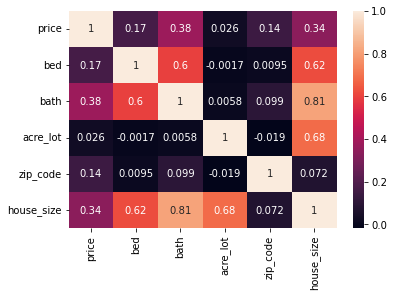

Correlation heatmap for state: Delaware


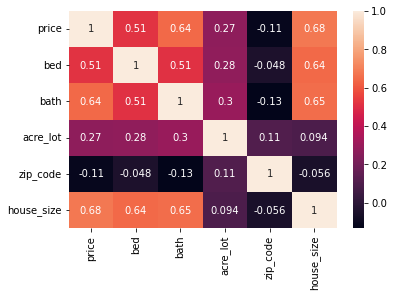

Correlation heatmap for state: Georgia


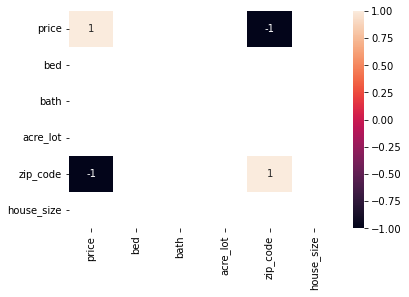

Correlation heatmap for state: Maine


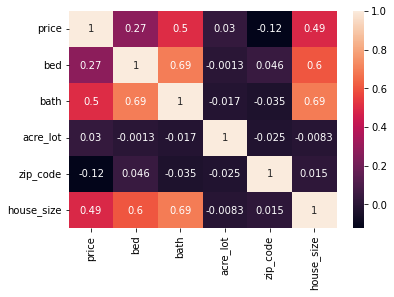

Correlation heatmap for state: Massachusetts


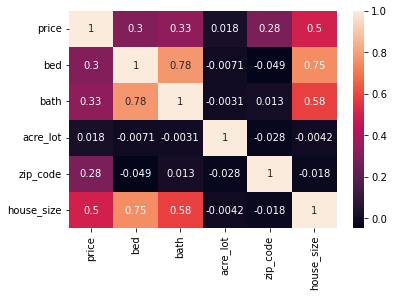

Correlation heatmap for state: New Hampshire


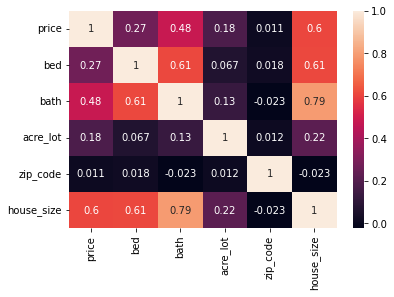

Correlation heatmap for state: New Jersey


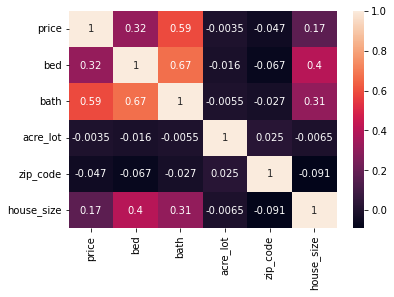

Correlation heatmap for state: New York


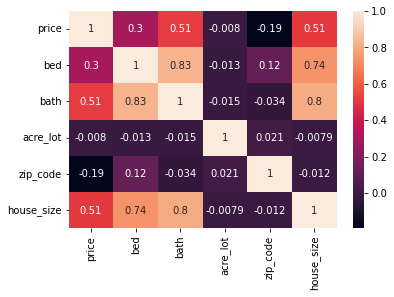

Correlation heatmap for state: Pennsylvania


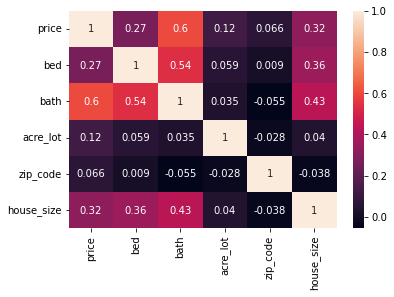

Correlation heatmap for state: Puerto Rico


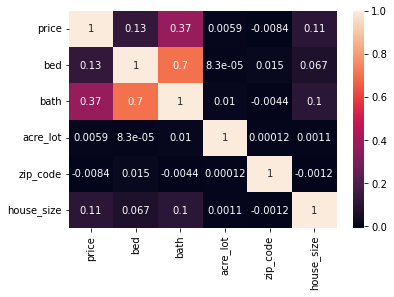

Correlation heatmap for state: Rhode Island


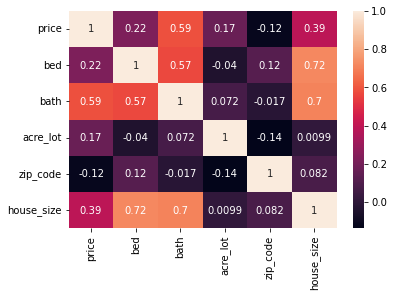

Correlation heatmap for state: South Carolina


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


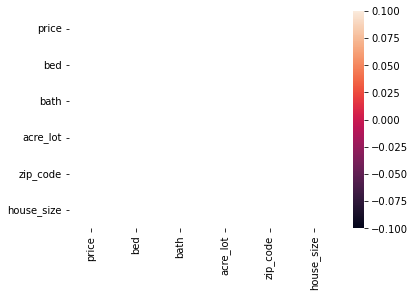

Correlation heatmap for state: Tennessee


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


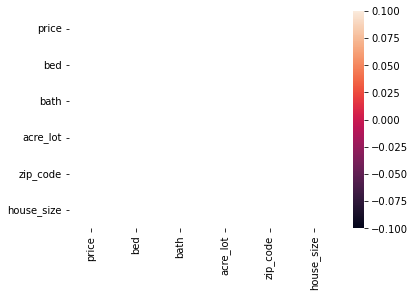

Correlation heatmap for state: Vermont


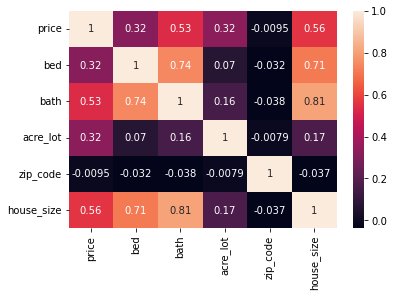

Correlation heatmap for state: Virgin Islands


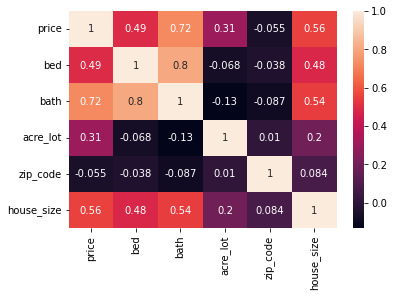

Correlation heatmap for state: Virginia


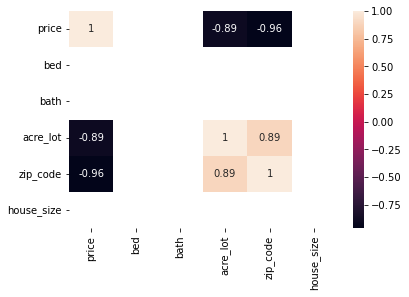

Correlation heatmap for state: West Virginia


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


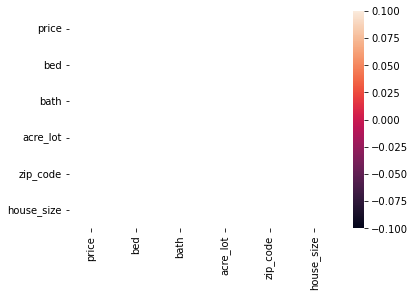

Correlation heatmap for state: Wyoming


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


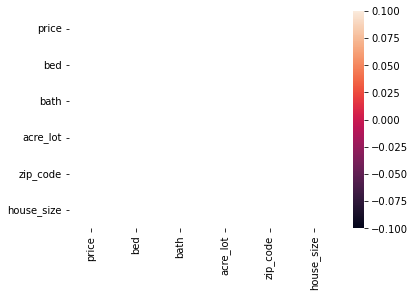

In [524]:
import seaborn as sns

# group data by state
grouped = df_notsold.groupby('state')

# calculate the correlation for each group and visualize it
for name, group in grouped:
    print("Correlation heatmap for state:", name)
    sns.heatmap(group.drop('state', axis=1).corr(),annot=True)
    plt.show()

# Modelling New York

In [525]:
#Create a datasaet for new york state
df_ny = df_notsold.loc[df['state'] == 'New York']

In [526]:
df_ny.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.298000e+04,81293.000000,88583.000000,29328.000000,92972.000000,59639.000000
mean,2.120762e+06,2.981843,2.434824,28.372913,10714.031924,1987.826741
std,4.106192e+06,2.626093,2.126015,1436.173953,963.347769,2159.012986
min,0.000000e+00,1.000000,1.000000,0.010000,10001.000000,122.000000
25%,4.500000e+05,1.000000,1.000000,0.050000,10024.000000,881.000000
50%,8.990000e+05,2.000000,2.000000,0.090000,10533.000000,1364.000000
75%,2.110000e+06,4.000000,3.000000,0.460000,11231.000000,2400.000000
max,1.690000e+08,68.000000,46.000000,100000.000000,99999.000000,112714.000000


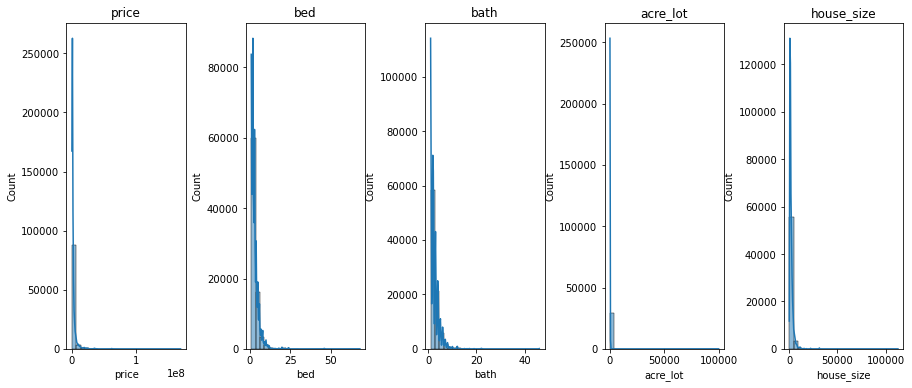

In [527]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [528]:
#Checking Qty of Apartments bigger then 4 bed

x= len(df_ny)

y = df_ny[df_ny["bed"]>4].shape[0]

z= y/x

print(x)
print(y)
print(z)


92980
13461
0.14477306947730695


In [529]:
#Remove Values bed > 4
df_ny= df_ny[df_ny["bed"]<5]


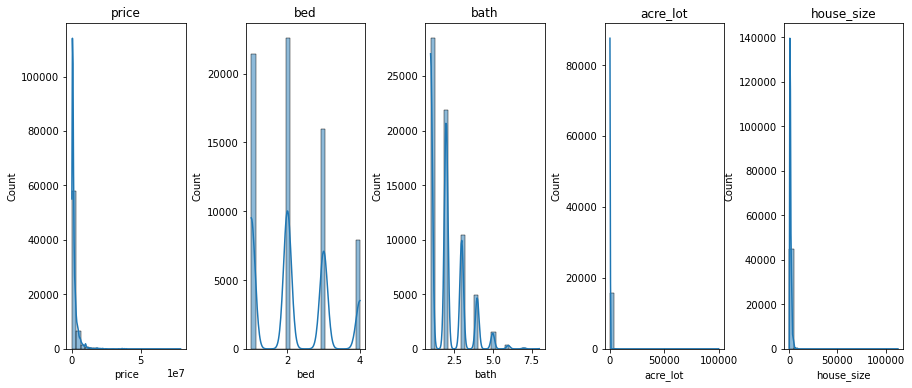

In [530]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [531]:
#Checking Qty of bath > 4

x= len(df_ny)

y = df_ny[df_ny["bath"]>4].shape[0]

z= y/x

print(x)
print(y)
print(z)


67832
1940
0.02860007076306168


In [532]:
#Remove Values bath > 4
df_ny= df_ny[df_ny["bath"]<5]


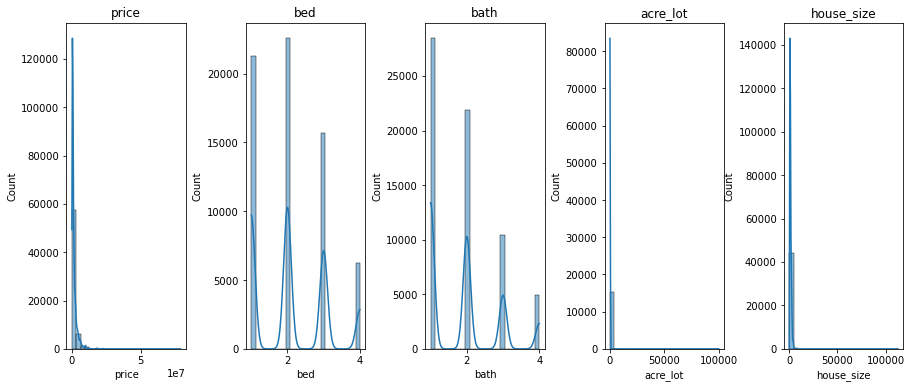

In [533]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [534]:
df_ny.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,6.577500e+04,65775.000000,65775.000000,15224.000000,65775.000000,44216.000000
mean,1.569809e+06,2.104432,1.876290,46.528027,10647.318221,1414.176814
std,2.197704e+06,0.965041,0.935935,1991.361622,653.215162,957.637355
min,0.000000e+00,1.000000,1.000000,0.010000,10001.000000,122.000000
25%,4.390000e+05,1.000000,1.000000,0.050000,10023.000000,850.000000
50%,8.390000e+05,2.000000,2.000000,0.100000,10468.000000,1182.000000
75%,1.850000e+06,3.000000,2.000000,0.410000,11226.000000,1748.500000
max,7.900000e+07,4.000000,4.000000,100000.000000,14534.000000,112714.000000


In [535]:
#Checking Qty of House Size

x= len(df_ny)

y = df_ny[df_ny["house_size"]>2000].shape[0]

z= y/x

print(x)
print(y)
print(z)


65775
8305
0.12626377803116687


In [536]:
#Remove Values house_size > 2000
df_ny= df_ny[df_ny["house_size"]<2000]

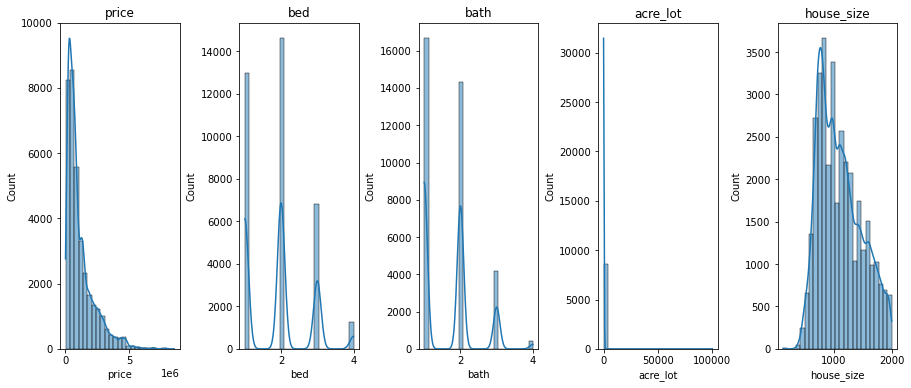

In [537]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','acre_lot','house_size']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [538]:
df_ny.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
30149,for_sale,175000.0,3.0,1.0,60.00,"187 Bly Hollow Rd, Berlin, NY, 12022",187 Bly Hollow Rd,Berlin,New York,12022.0,1176.0,NaT
54259,for_sale,419000.0,3.0,3.0,1.90,"1315 Lake View Rd, Copake, NY, 12516",1315 Lake View Rd,Copake,New York,12516.0,1800.0,NaT
54262,for_sale,365000.0,3.0,2.0,2.00,"105-111 Breezy Hl, Copake, NY, 12517",105-111 Breezy Hl,Copake,New York,12517.0,1482.0,NaT
54531,for_sale,125000.0,3.0,2.0,1.00,"66 Spicer Rd, Hoosick Falls, NY, 12090",66 Spicer Rd,Hoosick Falls,New York,12090.0,980.0,NaT
54539,for_sale,299900.0,3.0,1.0,0.32,"14 Evelyn Ln, Niverville, NY, 12130",14 Evelyn Ln,Niverville,New York,12130.0,1608.0,NaT


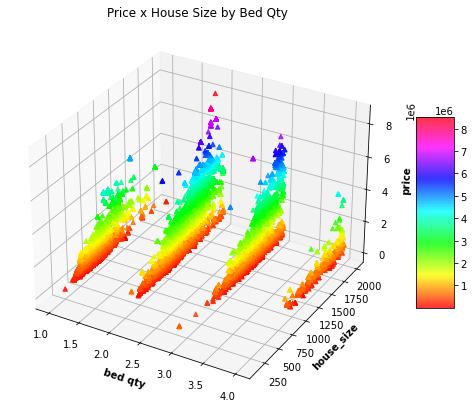

In [539]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = df_ny.iloc[:,1]
x = df_ny.iloc[:,2]
y = df_ny.iloc[:,10]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

plt.title("Price x House Size by Bed Qty")

ax.set_xlabel('bed qty', fontweight ='bold')
ax.set_ylabel('house_size', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

 
# show plot
plt.show()

# Modelling New York - 1bed

In [540]:
df_ny_1= df_ny[df_ny["bed"]==1]

In [541]:
#Understand Linear Regression about House_Size vs House_Price

import numpy as np

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X = np.array(df_ny_1['house_size']).reshape(-1, 1)

y = np.array(df_ny_1['price']).reshape(-1, 1)

# Separating the data into independent and dependent variables

# Converting each dataframe into a numpy array 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.coef_)
print(regr.intercept_)
regr.score(X_train, y_train)


[[1619.16102861]]
[-539605.20779881]


0.19802938261019343

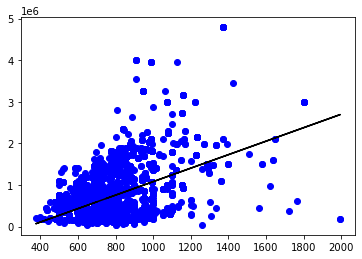

In [542]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

# Modelling New York - 1bed (detail by city)


In [543]:
#Print of house with prices

city_agg = df_ny_1.groupby("city").agg({
    'price':'count'
})

print(city_agg.sort_values(by=city_agg.columns[0], ascending=False))

                        price
city                         
New York City            3504
New York                 2682
Brooklyn                 1561
Bronx                     859
Yonkers                   649
...                       ...
Port Washington             1
Port Jefferson Station      1
Monroe                      1
Bethel                      1
New Windsor                 1

[96 rows x 1 columns]


In [544]:
df_ny_1.loc[df['city'] == "New York City", 'city'] = "New York"

In [545]:
#Print of house with prices

city_agg = df_ny_1.groupby("city").agg({
    'price':'count'
})

print(city_agg.sort_values(by=city_agg.columns[0], ascending=False))

                        price
city                         
New York                 6186
Brooklyn                 1561
Bronx                     859
Yonkers                   649
Manhattan                 364
...                       ...
Bethel                      1
Monroe                      1
Rocky Point                 1
Port Jefferson Station      1
Port Washington             1

[95 rows x 1 columns]


In [546]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create a boolean mask to filter the DataFrame to only include rows where the "city" column is equal to "New York City"

mask = df_ny_1['city'] == "New York"

# Use the boolean mask to filter the DataFrame
df_ny_1 = df_ny_1[mask]

#Converting each dataframe into a numpy array 
X = np.array(df_ny_1['house_size']).reshape(-1, 1)
y = np.array(df_ny_1['price']).reshape(-1, 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Creating Linear Regression Model

regr = linear_model.LinearRegression()

# Fitting the data into the model

regr.fit(X_train, y_train)

#Marke predictions using the testing set

y_pred=regr.predict(X_test)

#The mean squared error
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))

#The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Getting the score of the model
regr.score(X_train, y_train)

Mean Squared error: 303211796373.65
Coefficient of determination: 0.34


0.3574310575820766

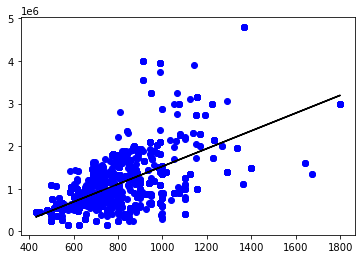

In [547]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values

In [548]:
df_ny_1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465538,for_sale,1295000.0,1.0,1.0,NaN,"47-49 King St Unit 8, New York City, NY, 10014",47-49 King St Unit 8,New York,New York,10014.0,775.0,NaT
465562,for_sale,753000.0,1.0,1.0,NaN,"111 Montgomery St Apt 5B, New York City, NY, 1...",111 Montgomery St Apt 5B,New York,New York,11225.0,718.0,NaT
465566,for_sale,1595000.0,1.0,1.0,NaN,"169 Huron St Ph A, New York City, NY, 11222",169 Huron St Ph A,New York,New York,11222.0,707.0,NaT
465589,for_sale,1995000.0,1.0,3.0,NaN,"260 W Broadway Units 3 & 4F, New York City, NY...",260 W Broadway Units 3 & 4F,New York,New York,10013.0,1270.0,NaT
465684,for_sale,850000.0,1.0,1.0,NaN,"180 Park Row Apt 12C, New York, NY, 10038",180 Park Row Apt 12C,New York,New York,10038.0,800.0,NaT


# Importing data from neighborhood


In [549]:
!pip install tabula-py

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping


In [550]:
import tabula
import pandas as pd

# Read the PDF file into a dataframe
pdf = tabula.read_pdf("Zip_Code.pdf", pages='all')[0]

pdf.head(100)

,Bronx,Unnamed: 0
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"
5,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,NaN
8,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
9,Southwest Brooklyn,"11209, 11214, 11228"


In [551]:
# change name of column dataset

pdf = pdf.rename(columns={'Bronx':"Neighborhood"})
pdf = pdf.rename(columns={'Unnamed: 0':'Zip Code'})

# Drop rows with NA
pdf = pdf.dropna()

In [552]:
pdf.head(100)

,Neighborhood,Zip Code
0,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468"
2,High Bridge and Morrisania,"10451, 10452, 10456"
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Kingsbridge and Riverdale,"10463, 10471"
5,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
8,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
9,Southwest Brooklyn,"11209, 11214, 11228"
10,Borough Park,"11204, 11218, 11219, 11230"


In [553]:
# Split the zip codes and create a new DataFrame with one column for each zip code
df_zip_codes = pdf['Zip Code'].str.split(',', expand=True)

#df_zip_codes = df_zip_codes.astype(int)

pdf = pd.concat([pdf, df_zip_codes], axis=1)

# Rename the columns
pdf = pdf.rename(columns={0: 'Zip Code 1', 1: 'Zip Code 2', 2: 'Zip Code 3', 3: 'Zip Code 4', 4: 'Zip Code 5', 
                        5: 'Zip Code 6',6: 'Zip Code 7',7: 'Zip Code 8',8: 'Zip Code 9'})

# Drop the original Zip Code column
pdf = pdf.drop(['Zip Code'], axis=1)


In [554]:
pdf.head(100)

,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,Central Bronx,10453,10457,10460,None,None,None,None,None,None
1,Bronx Park and Fordham,10458,10467,10468,None,None,None,None,None,None
2,High Bridge and Morrisania,10451,10452,10456,None,None,None,None,None,None
3,Hunts Point and Mott Haven,10454,10455,10459,10474,None,None,None,None,None
4,Kingsbridge and Riverdale,10463,10471,None,None,None,None,None,None,None
5,Northeast Bronx,10466,10469,10470,10475,None,None,None,None,None
6,Southeast Bronx,10461,10462,10464,10465,10472,10473,None,None,None
8,Central Brooklyn,11212,11213,11216,11233,11238,None,None,None,None
9,Southwest Brooklyn,11209,11214,11228,None,None,None,None,None,None
10,Borough Park,11204,11218,11219,11230,None,None,None,None,None


In [555]:
pdf.dtypes

Neighborhood    object
Zip Code 1      object
Zip Code 2      object
Zip Code 3      object
Zip Code 4      object
Zip Code 5      object
Zip Code 6      object
Zip Code 7      object
Zip Code 8      object
Zip Code 9      object
dtype: object

In [556]:
pdf = pdf.astype({'Neighborhood':'string','Zip Code 1':'float'})

In [557]:
pdf.dtypes

Neighborhood     string
Zip Code 1      float64
Zip Code 2       object
Zip Code 3       object
Zip Code 4       object
Zip Code 5       object
Zip Code 6       object
Zip Code 7       object
Zip Code 8       object
Zip Code 9       object
dtype: object

# Merge data (city vs Neighborhood)


In [558]:
df_ny_1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465538,for_sale,1295000.0,1.0,1.0,NaN,"47-49 King St Unit 8, New York City, NY, 10014",47-49 King St Unit 8,New York,New York,10014.0,775.0,NaT
465562,for_sale,753000.0,1.0,1.0,NaN,"111 Montgomery St Apt 5B, New York City, NY, 1...",111 Montgomery St Apt 5B,New York,New York,11225.0,718.0,NaT
465566,for_sale,1595000.0,1.0,1.0,NaN,"169 Huron St Ph A, New York City, NY, 11222",169 Huron St Ph A,New York,New York,11222.0,707.0,NaT
465589,for_sale,1995000.0,1.0,3.0,NaN,"260 W Broadway Units 3 & 4F, New York City, NY...",260 W Broadway Units 3 & 4F,New York,New York,10013.0,1270.0,NaT
465684,for_sale,850000.0,1.0,1.0,NaN,"180 Park Row Apt 12C, New York, NY, 10038",180 Park Row Apt 12C,New York,New York,10038.0,800.0,NaT


In [559]:
pdf.head()

,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,Central Bronx,10453.0,10457,10460,None,None,None,None,None,None
1,Bronx Park and Fordham,10458.0,10467,10468,None,None,None,None,None,None
2,High Bridge and Morrisania,10451.0,10452,10456,None,None,None,None,None,None
3,Hunts Point and Mott Haven,10454.0,10455,10459,10474,None,None,None,None,None
4,Kingsbridge and Riverdale,10463.0,10471,None,None,None,None,None,None,None


In [560]:
df_ny_1=pd.merge(df_ny_1, pdf, left_on='zip_code',right_on='Zip Code 1')

In [561]:
df_ny_1.head(100)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,...,Neighborhood,Zip Code 1,Zip Code 2,Zip Code 3,Zip Code 4,Zip Code 5,Zip Code 6,Zip Code 7,Zip Code 8,Zip Code 9
0,for_sale,1435000.0,1.0,1.0,NaN,"202 Broome St Unit 7L, New York City, NY, 10002",202 Broome St Unit 7L,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
1,for_sale,1470000.0,1.0,1.0,6.71,"252 South St Unit 59G, New York City, NY, 10002",252 South St Unit 59G,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
2,for_sale,1260000.0,1.0,1.0,6.71,"252 South St Unit 10N, New York City, NY, 10002",252 South St Unit 10N,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
3,for_sale,1450000.0,1.0,1.0,6.71,"252 South St Unit 20P, New York City, NY, 10002",252 South St Unit 20P,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
4,for_sale,1199999.0,1.0,1.0,NaN,"252 South St Unit 10P, New York, NY, 10002",252 South St Unit 10P,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,for_sale,1650000.0,1.0,1.0,0.24,"150 Rivington St Apt 2B, New York City, NY, 10002",150 Rivington St Apt 2B,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
96,for_sale,1495000.0,1.0,1.0,6.71,"252 South St Unit 42N, New York City, NY, 10002",252 South St Unit 42N,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
97,for_sale,645000.0,1.0,1.0,NaN,"387 Grand St Apt K301, New York, NY, 10002",387 Grand St Apt K301,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None
98,for_sale,1665000.0,1.0,1.0,NaN,"196 Orchard St Apt 4Q, New York, NY, 10002",196 Orchard St Apt 4Q,New York,New York,10002.0,...,Lower East Side,10002.0,10003,10009,None,None,None,None,None,None


In [562]:
df_ny_1.isnull().sum()

status             0
price              0
bed                0
bath               0
acre_lot        1516
full_address       0
street            20
city               0
state              0
zip_code           0
house_size         0
sold_date       2011
Neighborhood       0
Zip Code 1         0
Zip Code 2         0
Zip Code 3       286
Zip Code 4       852
Zip Code 5      1113
Zip Code 6      1658
Zip Code 7      2011
Zip Code 8      2011
Zip Code 9      2011
dtype: int64

In [563]:
# Dictionary of Column name with associated index.
idx_dic = {}
for col in df.columns:
    idx_dic[col] = df_ny_1.columns.get_loc(col)
print(idx_dic)

{'status': 0, 'price': 1, 'bed': 2, 'bath': 3, 'acre_lot': 4, 'full_address': 5, 'street': 6, 'city': 7, 'state': 8, 'zip_code': 9, 'house_size': 10, 'sold_date': 11}


In [567]:
#Drop Columns Zip Code

df_ny_1.drop(df_ny_1.iloc[:, 13:19], inplace=True, axis=1)

In [568]:
df_ny_1.head(100)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,Neighborhood
0,for_sale,1435000.0,1.0,1.0,NaN,"202 Broome St Unit 7L, New York City, NY, 10002",202 Broome St Unit 7L,New York,New York,10002.0,742.0,NaT,Lower East Side
1,for_sale,1470000.0,1.0,1.0,6.71,"252 South St Unit 59G, New York City, NY, 10002",252 South St Unit 59G,New York,New York,10002.0,688.0,NaT,Lower East Side
2,for_sale,1260000.0,1.0,1.0,6.71,"252 South St Unit 10N, New York City, NY, 10002",252 South St Unit 10N,New York,New York,10002.0,695.0,NaT,Lower East Side
3,for_sale,1450000.0,1.0,1.0,6.71,"252 South St Unit 20P, New York City, NY, 10002",252 South St Unit 20P,New York,New York,10002.0,723.0,NaT,Lower East Side
4,for_sale,1199999.0,1.0,1.0,NaN,"252 South St Unit 10P, New York, NY, 10002",252 South St Unit 10P,New York,New York,10002.0,723.0,NaT,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,for_sale,1650000.0,1.0,1.0,0.24,"150 Rivington St Apt 2B, New York City, NY, 10002",150 Rivington St Apt 2B,New York,New York,10002.0,718.0,NaT,Lower East Side
96,for_sale,1495000.0,1.0,1.0,6.71,"252 South St Unit 42N, New York City, NY, 10002",252 South St Unit 42N,New York,New York,10002.0,723.0,NaT,Lower East Side
97,for_sale,645000.0,1.0,1.0,NaN,"387 Grand St Apt K301, New York, NY, 10002",387 Grand St Apt K301,New York,New York,10002.0,800.0,NaT,Lower East Side
98,for_sale,1665000.0,1.0,1.0,NaN,"196 Orchard St Apt 4Q, New York, NY, 10002",196 Orchard St Apt 4Q,New York,New York,10002.0,686.0,NaT,Lower East Side


In [569]:
df_ny_1['house_size'] = df_ny_1['house_size'] * 0.304

In [573]:
#Print of house with prices

Neighborhood_agg = df_ny_1.groupby("Neighborhood").agg({
    'price':'mean',
    'house_size':'mean'
})

Neighborhood_agg['price_m2']= Neighborhood_agg['price']/Neighborhood_agg['house_size']

Neighborhood_agg['price'] = Neighborhood_agg['price'] / 1000

Neighborhood_agg['price'] = Neighborhood_agg['price'].apply('${:,.2f}K'.format)

Neighborhood_agg['house_size'] = Neighborhood_agg['house_size'].apply('{:,.2f}m^2'.format)

Neighborhood_agg.sort_values(by=['price_m2'], inplace=True)

print(Neighborhood_agg)

                                    price house_size      price_m2
Neighborhood                                                      
Bronx Park and Fordham           $245.00K  255.36m^2    959.429825
Kingsbridge and Riverdale        $372.43K  262.58m^2   1418.311105
Stapleton and St. George         $495.00K  334.40m^2   1480.263158
Sunset Park                      $447.00K  237.12m^2   1885.121457
Inwood and Washington Heights    $389.00K  183.68m^2   2117.829866
Southwest Brooklyn               $559.17K  249.03m^2   2245.408792
Central Harlem                   $610.15K  228.48m^2   2670.470892
East New York and New Lots       $595.00K  213.41m^2   2788.086670
Upper East Side                  $723.59K  246.24m^2   2938.565808
Southern Brooklyn                $550.00K  180.88m^2   3040.689960
East Harlem                      $606.53K  198.82m^2   3050.725128
Bushwick and Williamsburg        $604.09K  181.53m^2   3327.759066
Northwest Queens                 $704.50K  202.59m^2   3477.42

In [500]:
Neighborhood_agg.dtypes

price          object
house_size     object
price_m2      float64
dtype: object

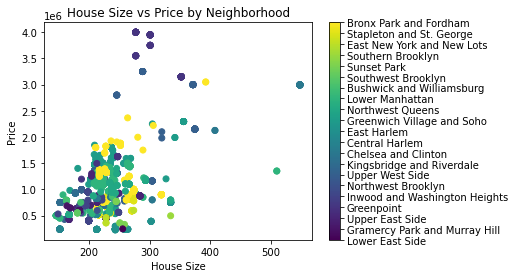

In [574]:
# Create a scatter plot
plt.scatter(df_ny_1['house_size'], df_ny_1['price'], c=df_ny_1['Neighborhood'].astype('category').cat.codes, cmap='viridis')

# Add a color bar for the neighborhoods
cbar = plt.colorbar()
cbar.set_ticks(range(len(df_ny_1['Neighborhood'].unique())))
cbar.set_ticklabels(df_ny_1['Neighborhood'].unique())

# Add axis labels and title
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("House Size vs Price by Neighborhood")

# Show the plot
plt.show()

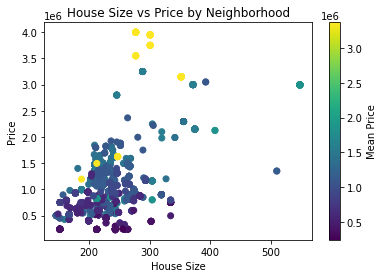

In [575]:
# Calculate the mean price for each neighborhood
mean_price = df_ny_1.groupby('Neighborhood')['price'].mean().sort_values()

# Create a scatter plot
plt.scatter(df_ny_1['house_size'], df_ny_1['price'], c=df_ny_1['Neighborhood'].map(mean_price), cmap='viridis')

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Mean Price")

# Add axis labels and title
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("House Size vs Price by Neighborhood")

# Show the plot
plt.show()

# Modelling New York - 1bed, 1st class

In [588]:
df_ny_1st= df_ny_1[df_ny_1["Neighborhood"]=="Greenwich Village and Soho"]

In [589]:
df_ny_1st.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,Neighborhood
1783,for_sale,825000.0,1.0,1.0,NaN,"250 Mercer St Apt C318, New York, NY, 10012",250 Mercer St Apt C318,New York,New York,10012.0,212.80,NaT,Greenwich Village and Soho
1784,for_sale,850000.0,1.0,1.0,NaN,"77 Bleecker St Apt 621, New York City, NY, 10012",77 Bleecker St Apt 621,New York,New York,10012.0,235.60,NaT,Greenwich Village and Soho
1785,for_sale,2125000.0,1.0,1.0,NaN,"242 Lafayette St Apt 2N, New York City, NY, 10012",242 Lafayette St Apt 2N,New York,New York,10012.0,407.36,NaT,Greenwich Village and Soho
1786,for_sale,799000.0,1.0,2.0,NaN,"77 Bleecker St Unit 109W, New York, NY, 10012",77 Bleecker St Unit 109W,New York,New York,10012.0,304.00,NaT,Greenwich Village and Soho
1787,for_sale,825000.0,1.0,1.0,NaN,"250 Mercer St Apt C318, New York, NY, 10012",250 Mercer St Apt C318,New York,New York,10012.0,212.80,NaT,Greenwich Village and Soho


In [590]:
#Converting each dataframe into a numpy array 
X = np.array(df_ny_1st['house_size']).reshape(-1, 1)
y = np.array(df_ny_1st['price']).reshape(-1, 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Creating Linear Regression Model

regr = linear_model.LinearRegression()

# Fitting the data into the model

regr.fit(X_train, y_train)

#Marke predictions using the testing set

y_pred=regr.predict(X_test)

#The mean squared error
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))

#The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Getting the score of the model
regr.score(X_train, y_train)

Mean Squared error: 22066717752.38
Coefficient of determination: 0.98


0.992745835193095

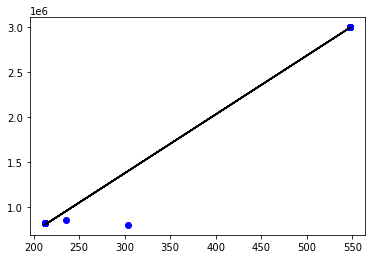

In [591]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

# Data scatter of predicted values